<a href="https://colab.research.google.com/github/anonymax25/tensorflow-jupyter-exo/blob/master/02_regression_avec_les_reseaux_de_neurones_dans_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Régression avec les réseaux de neurones dans TensorFlow

Ce notebook est une introduction à la régression avec les réseaux de neurones dans TensorFlow.

Il y a plusieurs définitions pour la régression mais dans notre cas, nous allons la simplifier au fait de prédire un nombre.

Par exemple, dans un problème de régression, vous pouvez vouloir :
- prédire le prix de vente de biens immobiliers en fonction d'informations données (telles que le nombre de pièces, la surface du bien, le nombre de salles de bains, etc...)
- prédire les coordonnées délimitant un objet dans une image
- prédire le coût d'une assurance médicale pour un individu en fonction de ses caractéristiques (âge, sexe, profession, etc...)

Nous allons voir comment ici comment construire un réseau de neurones à partir d'échantillons de données, comment trouver les "patterns" (relations) dans ces données d'entrée et comment faire des prédictions à partir de ces données.

Voici en détail ce que nous allons aborder :
- architecture d'un modèle de régression
- forme des données d'entrée et de sortie
  - `X` : caractéristiques/variables/données (inputs)
  - `y` : étiquette/variable à expliquer (output)
- visualiser les données (lorsque c'est possible)
- étapes de la modélisation
  - créer un modèle
  - définir une fonction de coût
  - choisir/créer les métriques d'évaluation
  - ajuster un modèle (c'est-à-dire faire en sorte que le modèle trouver les tendances dans nos données)
- évaluer un modèle
  - visualiser le modèle
  - regarder les courbes d'apprentissage
  - comparer les prédictions aux valeurs réelles (en utilisant nos métriques d'évaluation)
- sauvegarder un modèle (pour pouvoir l'utiliser plus tard si besoin)
- charger un modèle

## 1. Architecture d'un réseau de neurones pour un problème de régression

Il y a beaucoup de façons différentes de créer un réseau de neurones.

Voici l'architecture typique d'un réseau de neurones pour la régression :

| **Hyperparamètre** | **Valeur typique** |
| --- | --- |
| Input layer shape | Même forme que le nombre de variables (par exemple 3 pour `chambres`, `salle de bains`, `emplacement pour voitures` dans une prédiction de prix de biens immobiliers) |
| Hidden layer(s) | Spécifique au problème, minimum = 1, maximum = illimité |
| Neurons per hidden layer | spécifique au problème, généralement de 10 à 100 |
| Output layer shape | Même forme que celle de la prédiction souhaitée (par exemple 1 le prix d'un bien immobilier) |
| Hidden activation | Généralement [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://fr.wikipedia.org/wiki/Erreur_quadratique_moyenne) (mean square error) ou [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combinaison entre MAE/ et SE) s'il y a des valeurs aberrantes |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

(source : *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*, livre d'Aurélien Geron)

Pour le moment, ce tableau peut sembler assez vague, surtout si les réseaux de neurones et le machine/deep learning sont nouveaux pour vous !

Pas de panique, nous aurons l'occasion d'y revenir en détail plus tard.

Place à la pratique !

## 2. Exemple rapide de visualisation de données

Lorsque c'est possible, il est très utile de visualiser les données d'entrée du problème, avant de se lancer dans la partie modélisation.

Puisque nous allons travailler sur la régression (prédire un nombre), nous allons commencer par créer des données linéaires (une simple ligne droite) :

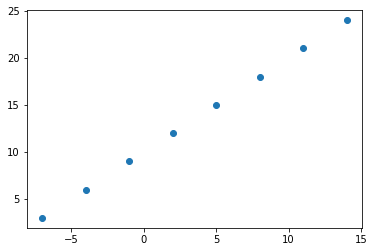

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Création des variables (ici 1 seule variable, donc dimension(X)=1)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Création de la variable à expliquer (étiquette ou label en anglais)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualisation de l'étiquette y en fonction de X
plt.scatter(X, y);

En regardant la visualisation obtenue, est-ce qu'on ne pourrait pas calculer la relation entre `X` et `y` ?

Par exemple, nous pourrions nous demander, en se basant sur ces données, quelle serait la valeur de `y` pour `X = 17` ? Ou `X = -10` ?

Cette recherche de relation (*pattern*) est la raison pour laquelle nous créerons les réseaux de neurones : pour qu'ils fassent le travail pour nous !

## 3. Forme des données d'entrée (*inputs)* et de sortie (*outputs*)

Un des concepts les plus importants lorsque l'on travaille avec des réseaux de neurones est la forme des données (entrée et sortie) :
- ce que l'on appelle la forme des données d'entrée est la forme des données qui seront consommées par le modèle
- et la forme des données de sortie est la forme des données qui seront produites par le modèle

Elles peuvent être différentes, en fonction du problème traité.

Les réseaux de neurones acceptent des données numériques en entrée et produiront des nombres également en sortie. Ces nombres sont généralement représentés par des tenseurs.

Auparavant, dans la partie **2.**  , nous avons créé des données à partir des tableaux NumPy (NumPy arrays), mais nous aurions pu faire la même chose avec les tenseurs :

In [3]:
import tensorflow as tf
print(tf.__version__) # pour vérifier la version

2.5.0


In [4]:
# Création des variables (en utilisant les tenseurs de type constant)
X = 

# Création de la variable à expliquer (en utilisant les tenseurs de type constant)
y = 

# Visualize it
plt.scatter(X, y);

SyntaxError: ignored

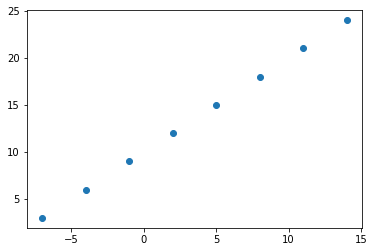

In [5]:
# Création des variables (en utilisant les tenseurs de type constant)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Création de la variable à expliquer (en utilisant les tenseurs de type constant)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

Notre objectif va être d'utiliser `X` (*variables/caractéristiques/features*) pour prédire `y` (*variable à expliquer/étiquette/label*).

Donc nos données d'entrée seront représentées par le tenseur `X` et notre donnée de sortie sera le tenseur `y` .

Maintenant que l'on sait cela, regardons la forme des données :

In [ ]:
forme_input = X[0].

forme_output = y[0].

forme_input, forme_output

In [6]:
forme_input = X[0].shape

forme_output = y[0].shape

forme_input, forme_output

(TensorShape([]), TensorShape([]))

Nos données n'ont donc pas de forme ?

Si l'on regarde directement `X[0]` et `y[0]` :

In [7]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

Ce qu'il faut savoir c'est que quel que soit les données que notre modèle consommera, il prendra toujours en compte les données d'entrée et de sortie en tant que tenseur :
- dans notre cas, nous allons essayer de prédire la tendance entre 1 valeur de `X` (par exemple `X[0]` égal à -7) et 1 valeur de `y` (par exemple `y[0]` égal à 3)
- nous avons donc le cas d'un scalaire, c'est-à-dire un tenseur de rang 0

Nous aurons l'occasion de voir plusieurs autres exemples, ce qui vous permettra de mieux comprendre l'importance des formes des données.

## 4. Modélisation

Comment créer un réseau de neurones à partir de nos données ?

Dans TensorFlow, il y a généralement 3 étapes afin de créer et entraîner un modèle :
1. **Créer un modèle** : assembler les couches d'un réseau de neurones soi-même (à l'aide de l'API [fonctionnelle Keras](https://www.tensorflow.org/guide/keras/functional) ou [séquentielle Keras](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) ou importer un modèle déjà construit précédemment

2. **Compiler un modèle** : définir comment les performances du modèle devraient se mesurer (fonction coût/métrique) et comment les optimiser (optimizer)

3. **Entraîner un modèle** : laisser le modèle essayer de trouver les tendances (*patterns*) dans les données

### 4.1. Exemple du processus de création sur notre exemple simple

Pour construire notre modèle pour notre problème de régression, nous allons utiliser l'API séquentielle Keras : elle est disponible directement à partir du module `keras` de TensorFlow.

Crééons notre modèle et entraînons-le à partir de nos données (création/compilation/entraînement) :

In [8]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# Création d'un modèle d'une couche en utilisant l'API séquentielle
modele = 

# Compilation du modèle, aevc la MAE comme fonction de coût et comme mesure de performance, et la descente de gradient SGD comme optimizer


# Entraînement du modèle sur 5 époques


SyntaxError: ignored

Félicitations : vous venez d'entraîner votre premier réseau de neurones !

Nous avons donc un modèle qui nous permet de prédire les valeurs de `y`.

Comment faire des prédictions ? C'est très simple, grâce à la méthode `predict()` du modèle :

In [12]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# Création d'un modèle d'une couche en utilisant l'API séquentielle
modele = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compilation du modèle, aevc la MAE comme fonction de coût et comme mesure de performance, et la descente de gradient SGD comme optimizer
modele.compile(optimizer="sgd", loss=tf.keras.losses.mae, metrics=["mae"])

# Entraînement du modèle sur 5 époques
modele.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 327ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
# Prédiction pour une valeur de `X` de 17


In [13]:
modele.predict([17])

array([[12.716021]], dtype=float32)

Le résultat n'est pas très bon ... Nous devrions plutôt avoir quelque chose proche de 27.

### 4.2. Améliorer un modèle

Pour améliorer notre modèle, nous allons faire des modifications sur presque chacune des étapes par lesquelles nous sommes passées :

1. **Créer un modèle** : ici nous pouvons faire plusieurs modifications :
    - ajouter des couches supplémentaires
    - augmenter le nombre de neurones (aussi appelés *hidden units* en anglais) pour chaque couche
    - changer la fonction d'activation de chaque couche

2. **Compiler un modèle** : nous pouvons choisir une fonction d'optimisation ou changer le taux d'apprentissage de la fonction d'optimisation

3. **Entraîner un modèle** : nous pouvons entraîner le modèle sur plus d'*époques* ou sur plus de données

Cela fait beaucoup de possibilités !

Ce qu'il faut garder en tête c'est que la façon de modifier l'étape de construction du modèle va dépendre du problème sur lequel vous travaillez.

Dans notre cas, nous allons d'abord faire simple pour commencer et seulement entraîner notre modèle plus longtemps :

In [ ]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# Création d'un modèle en utilisant l'API séquentielle
modele = 

# Compilation du modèle


# Entraînement du modèle sur 100 époques


In [14]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# Création d'un modèle d'une couche en utilisant l'API séquentielle
modele = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compilation du modèle, aevc la MAE comme fonction de coût et comme mesure de performance, et la descente de gradient SGD comme optimizer
modele.compile(optimizer="sgd", loss=tf.keras.losses.mae, metrics=["mae"])

# Entraînement du modèle sur 100 époques
modele.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 268ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 6m

Vous avez peut-être remarqué que la valeur de perte/erreur (*loss*) a diminué par rapport au calcul précédent (elle a continué à baisser au fur et à mesure des époques).

Qu'est-ce que cela signifie par rapport aux prédictions du modèle ? Faisons à nouveau une prédiction pour `X` égal à 17 :

In [15]:
modele.predict([17])

array([[30.158512]], dtype=float32)

C'est déjà mieux ! Mais cela pourrait être meilleur.

## 5. Evaluer un modèle
### 5.1. Visualiser un modèle

Nous allons d'abord créer un jeu de données plus grand (50 valeurs) et les étiquettes associées (toujours avec la même relation `y=X+10`) :

In [ ]:
# en utilisant np.arange
X = 
X

In [16]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
# en utilisant np.arange
y = 
y

In [17]:
Y = np.arange(-90, 107, 4)
Y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

Ceci est équivalent à :

In [ ]:
# en utilisant directement la relation entre X et y
y =
y

In [18]:
# en utilisant directement la relation entre X et y
y = X+10
Y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

Nous allons ensuite partager nos données en un jeu d'entraînement et un jeu de test.

Crééons ces 2 jeux de données en partageant nos variables `X` et `y` :

In [ ]:
# taille des données
len(X)

In [19]:
# partage des données de sorte à conserver les 40 premières valeurs pour le jeu d'entraînement (80% des données)
X_train = X[0:39]

y_train = 

X_test =  X[0:39]
y_test = 

len(X_train), len(X_test)

SyntaxError: ignored

In [20]:
# partage des données de sorte à conserver les 40 premières valeurs pour le jeu d'entraînement (80% des données)
X_train = X[0:40]

y_train = Y[0:40]

X_test =  X[40:50]
y_test =  Y[40:50]

len(X_train), len(X_test)

(40, 10)

### 5.2. Visualiser les données

Maintenant que nous avons nos jeux d'entraînement et de test, il est judicieux de les visualiser.

Traçons les données en les différentiant avec 2 couleurs différentes :

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(, , c='b', label="")
plt.scatter(, , c='g', label='')
plt.legend();

No handles with labels found to put in legend.


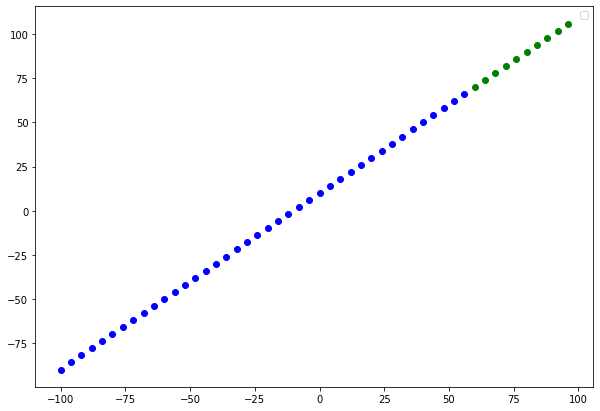

In [21]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', label="")
plt.scatter(X_test, y_test, c='g', label='')
plt.legend();

### 5.3. Visualiser le modèle

Nous allons reprendre les mêmes étapes que précédemment pour créer notre nouveau modèle :

In [ ]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# Création d'un modèle en utilisant l'API séquentielle
modele = 

# Compilation du modèle


In [22]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# Création d'un modèle d'une couche en utilisant l'API séquentielle
modele = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compilation du modèle, aevc la MAE comme fonction de coût et comme mesure de performance, et la descente de gradient SGD comme optimizer
modele.compile(optimizer="sgd", loss=tf.keras.losses.mae, metrics=["mae"])


Après avoir créé notre modèle à partir d'une instance de la classe `Sequential` du module `keras` et avoir compilé notre modèle, si l'on essaie de visualiser notre modèle à l'aide la méthode `summary()` :

In [23]:
modele.summary()

ValueError: ignored

Cela provoque une erreur qui est assez explicite.

Nous n'avons pas encore "construit" notre modèle (il n'est pas entraîné) et nous n'avons pas non plus spécifié la forme des données d'entrée (*input shape*).

Nous pouvons définir la forme de nos données en utilisant le paramètre `input_shape` de la première couche (lui donner par exemple la valeur `1`) :

In [24]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# Création d'un modèle d'une couche en utilisant l'API séquentielle
modele = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[1])])

# Compilation du modèle, aevc la MAE comme fonction de coût et comme mesure de performance, et la descente de gradient SGD comme optimizer
modele.compile(optimizer="sgd", loss=tf.keras.losses.mae, metrics=["mae"])


Cette fois, l'appel à la méthode `summary()` devrait fonctionner :

In [25]:
modele.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


`summary()` nous montre les différentes couches du modèle, la forme des données de sortie et le nombre de paramètres :
- **Total params :** nombre total de paramètres du modèle
- **Trainable params :** ce sont les paramètres que le modèle met à jour au fur et à mesure de l'entraînement (ces paramètres sont aussi parfois appelés *patterns*)
- **Non-trainable params :** ces paramètres ne sont pas mis à jour pendant l'entraînement du modèle

Entraînons maintenant notre modèle sur le jeu d'entraînement :

In [ ]:
# entraînement sur 100 époques


In [26]:

modele.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - 

In [ ]:
# appel à la méthode summary


In [27]:
modele.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Nous pouvons également avoir une visualisation 2D de notre modèle à l'aide de `plot_model()` :

https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv%22

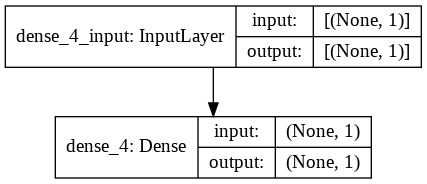

In [28]:
tf.keras.utils.plot_model(modele,show_shapes=True)

Vous pouvez constater que notre modèle ne comporte ici qu'une seule entrée et une sortie ; mais la visualisation de modèle complexes peut être très utile pour le débogage de problème.

### 5.4. Visualiser les prédictions

Le modèle étant entraîné, nous pouvons visualiser ses prédictions.

Pour cela, c'est toujours une bonne idée de les tracer avec les valeurs réelles (lorsque cela est possible).

Souvent cela est de la forme `y_test` vs `y_pred`.

Commençons par faire les prédictions sur le jeu de test `X_test` :

In [ ]:
y_pred =
y_pred

In [29]:
y_pred = modele.predict(X_test)
y_pred

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

Créons une fonction qui nous permettra de faire notre visualisation à partir de la liste de prédictions obtenue :

In [30]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
    """
    Tracé du jeu d'entraînement, du jeu de test et des prédictions du modèle
    """
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', label="Jeu d'entraînement")
    plt.scatter(test_data, test_labels, c='g', label='Jeu de test')
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend();

Nous pouvons maintenant passer à la visualisation de nos prédictions :

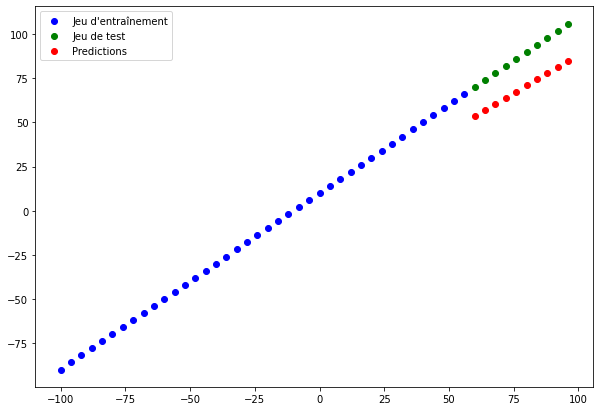

In [31]:
plot_predictions()

Nous pouvons constater que nos prédicitons ne sont pas totalement aberrantes mais qu'elles n'ont rien d'exceptionnel non plus.

### 5.5. Evaluer les prédictions

En parallèle de la visualisation, les métriques d'évaluation sont votre meilleure option pour évaluer votre modèle.

En fonction du problème, les modèles utilisés ont différentes mesures de performance.

Deux principales mesures utilisées pour les problèmes de régression sont :
- **erreur absolue moyenne :** mean absolute error ou MAE en anglais
- **erreur quadratique moyenne :** mean square error ou MSE en anglais

Plus leurs valeurs sont faibles, mieux c'est.

Vous pouvez également utiliser `modele.evaluate()` qui vous retournera la pete du modèle ainsi que les métriques définies pendant l'étape de compilation du modèle :

In [32]:
modele.evaluate(X_test, y_test)

1/1 [==============================] - 0s 122ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

Dans notre cas, puisque nous avons utilisé la MAE pour notre fonction coût et pour notre mesure de performance, `modele.evaluate()` nous retourne deux fois le même résultat.

TensorFlow a des fonctions pré-disponibles pour la MSE et la MAE.

Pour beaucoup de fonctions d'évaluation, le postulat est le même : comparer les prédictions aux valeurs réelles.

Calculons l'erreur absolue moyenne (en utilisant la fonction disponible dans TensorFlow) :

In [ ]:
mae =
mae

In [33]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
       14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>

Ne devrait-on pas avoir une unique valeur, au lieu des 10 valeurs que nous obtenons ?

Cela est dû au fait que `y_test` et `y_pred` ont des formes différentes :

In [ ]:
y_test

In [34]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
y_pred

In [35]:
y_pred

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [37]:
# forme des tenseurs
y_test.shape, y_pred.shape

((10,), (10, 1))

In [ ]:
y_test.shape , y_pred.shape

Nous l'avons déjà dit un peu plus haut : traiter les formes des données d'entrée et de sortie est un des problèmes les plus courants que vous rencontrerez.

Pas de panique : nous pouvons corriger ce problème en utilisant `squeeze()`.
Cela enlèvera la dimension `1` du tenseur `y_pred` afin qu'il ait la même forme que le tenseur `y_test` :

In [38]:
y_pred.squeeze()

array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
       74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)

In [ ]:
# forme du nouveau tenseur arès modification
y_pred.

In [39]:
y_pred.squeeze().shape

(10,)

Nous pouvons maintenant utiliser notre mesure de performance :

In [ ]:
mae = 
mae

In [40]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

Avec la MSE :

In [ ]:
mse = 
mse

In [41]:
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

Vous pouvez également calculer la MAE en utilisant des fonctions de base de TensorFlow, en partant que la formule mathématique de la MAE :

In [42]:
tf.reduce_mean(tf.abs(y_test-y_pred.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=18.745327377319335>

Nous pouvons définir des fonctions pour nos mesures de performances, que nous serons amenés à utiliser tout au long du notebook :

In [ ]:
def mae(y_test, y_pred):
    """
    Calcule l'erreur absolue moyenne entre y_test et y_pred.
    """
    return 

def mse(y_test, y_pred):
    """
    Calcule l'erreur quadratique moyenne entre y_test et y_pred.
    """
    return 

In [43]:
def mae(y_test, y_pred):
    """
    Calcule l'erreur absolue moyenne entre y_test et y_pred.
    """
    return tf.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
    """
    Calcule l'erreur quadratique moyenne entre y_test et y_pred.
    """
    return tf.metrics.mean_squared_error(y_test, y_pred)

### 5.6. Améliorer un modèle

Après avoir vu les mesures de performance et les prédictions que votre modèle fait, il est très probable que vous souhaitiez améliorer votre modèle.
Il y a plusieurs façons de procéder, mais voici trois principales manières d'améliorer un modèle :
1. **obtenir plus de données :** obtenir plus d'exemples pour l'entraînement du modèle (plus d'opportunités d'apprendre de nouvelles relations (*patterns*)
2. **rendre notre modèle plus "large" (utiliser un modèle plus complexe) :** cela peut consister à ajouter plus de couches (*layers*) ou plus de neurones (*hidden units*) dans chaque couche
3. **augmenter le temps d'entraînement :** donner au modèle plus de chance de trouver des relations dans les données

Puisque nous avons créé notre jeu de données ici, nous pourrions facilement ajouter plus de données ; néanmoins, cela n'est pas toujours faisable lorsque l'on travaille sur de vrais jeux de données.

Nous allons plutôt considérer les points **2** et **3**.

Pour cela, nous allons construire 3 modèles et comparer leurs résultats :
1. `modele_1` : le même que le modèle d'origine, avec 1 couche et entrainé sur 100 époques
2. `modele_2` : 2 couches et entraîné sur 100 époques
3. `modele_3` : 2 couches et entraîné sur 500 époques

Construisons ces modèles et affichons pour chaque modèle le tracé des prédictions ainsi que les deux mesures de performance MAE et MSE :

`modele_1` :

In [ ]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# Création d'un modèle en utilisant l'API séquentielle
modele_1 = 

# Compilation du modèle


# Entraînement du modèle


In [44]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# Création d'un modèle en utilisant l'API séquentielle
modele_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compilation du modèle
modele_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

# Entraînement du modèle
modele_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - 

In [ ]:
# Prédiction du premier modèle
y_pred_1 = 
plot_predictions(predictions=y_pred_1)

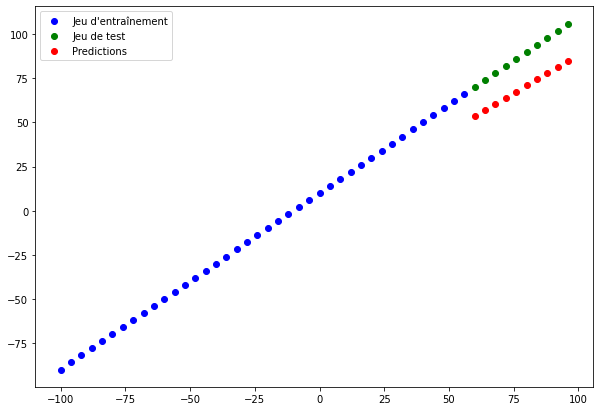

In [45]:
y_pred_1 = modele_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
# Mesures de performance
mae_1 = mae(, ).numpy()
mse_1 = mse(, ).numpy()
mae_1, mse_1

In [46]:
mae_1 = mae(y_test, y_pred_1.squeeze()).numpy()
mse_1 = mse(y_test, y_pred_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.57336)

`modele_2` :

In [ ]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# Création d'un modèle en utilisant l'API séquentielle


# Compilation du modèle


# Entraînement du modèle


In [47]:
tf.random.set_seed(42)

# Création d'un modèle en utilisant l'API séquentielle
modele_2 = tf.keras.Sequential([tf.keras.layers.Dense(1),tf.keras.layers.Dense(1)])

# Compilation du modèle
modele_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

# Entraînement du modèle
modele_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Prédiction du deuxième modèle
y_pred_2 = 
plot_predictions()

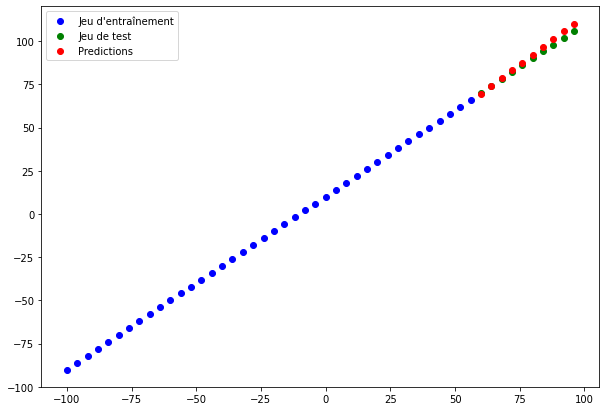

In [48]:
y_pred_2 = modele_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
# Mesures de performance
mae_2 = 
mse_2 = 
mae_2, mse_2

In [49]:
mae_2 = mae(y_test, y_pred_2.squeeze()).numpy()
mse_2 = mse(y_test, y_pred_2.squeeze()).numpy()
mae_2, mse_2

(1.9098114, 5.459232)

`modele_3` :

In [ ]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# Création d'un modèle en utilisant l'API séquentielle
modele_3 = 

# Compilation du modèle


# Entraînement du modèle


In [50]:
tf.random.set_seed(42)

modele_3 = tf.keras.Sequential([tf.keras.layers.Dense(1),tf.keras.layers.Dense(1)])

modele_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

modele_3.fit(X_train, y_train, epochs=500, verbose=0)

In [ ]:
# Prédiction du troisième modèle
y_pred_3 = 
plot_predictions()

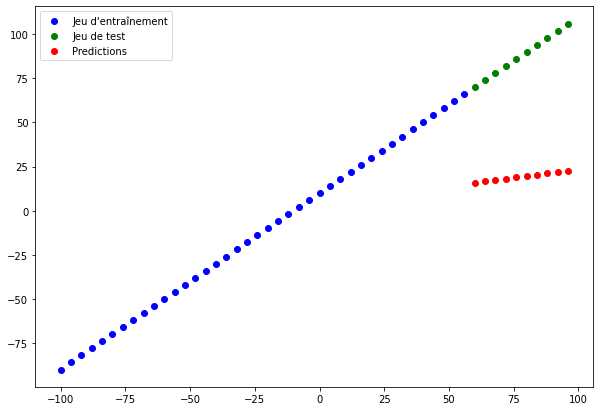

In [51]:
y_pred_3 = modele_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
# Mesures de performance
mae_3 = 
mse_3 = 
mae_3, mse_3

In [52]:
mae_3 = mae(y_test, y_pred_3.squeeze()).numpy()
mse_3 = mse(y_test, y_pred_3.squeeze()).numpy()
mae_3, mse_3

(68.68786, 4804.4717)

Etrange les résultats du dernier modèle ! Nous avons augmenté le temps d'entraînement par rapport à `modele_2` : nous aurions ainsi pu penser que cela donnerait à notre modèle plus de chance pour trouver les relations dans les données (*learn patterns* en anglais).

Finalement, notre modèle s'est plutôt entraîné trop longtemps et a cela a conduit a des résultats plus médiocres.

Comparons les résultats obtenus (les MAE et MSE pour chaque modèle) sous la forme d'un `DataFrame` :

In [ ]:
resultats = [["modele_1", , ],["modele_2", , ],["modele_3", , ]]

In [53]:
resultats = [["modele_1", mae_1, mse_1],["modele_2", mae_2, mse_2],["modele_3", mae_3, mse_3]]

In [55]:
import pandas as pd
df_resultats = pd.DataFrame(resultats, columns=["modele", "mae", "mse"])
df_resultats

,modele,mae,mse
0,modele_1,18.745327,353.573364
1,modele_2,1.909811,5.459232
2,modele_3,68.687859,4804.471680


Ici, dans cet essai-là, il semble que `modele_2` est le plus performant.

## 6. Sauvegarder un modèle

Lors de vos projets, une fois que vous aurez entraîné un ou des modèles et que vous aurez trouvé le meilleur d'entre eux, vous voudrez probablement le sauvegarder pour pouvoir le réutiliser ailleurs (par exemple sur une application web ou un appareil portable).

La méthode `save()` permet la sauvegarde d'un modèle TensorFlow/Keras.

Il y a deux façons de faire cette sauvegarde de modèle :
1. le [format SavedModel](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (défaut)
2. le [format HDF5](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format)

Nous allons tester la sauvegarde dans les deux formats de notre meilleur modèle, `modele_2` :

In [56]:
# Sauvegarde au format par défaut SavedModel
modele_2.save('modele')


INFO:tensorflow:Assets written to: modele/assets


In [57]:
# Vérification du dossier créé
!ls 

modele	model.png  sample_data


In [58]:
# Sauvegarde au format HDF5
modele_2.save('modele.h5')

In [59]:
# Vérification du fichier créé
!ls

modele	modele.h5  model.png  sample_data


## 6. Charger un modèle

Nous pouvons utiliser la méthode `load_model()` du module `models` de Keras dans TensorFlow, pour charger un modèle sauvegardé.

Le chargement des différents formats (SavedModel et HDF5) est le même.

Testons cela en commençant par charger le modèle au format SavedModel puis en vérifiant que les prédictions sont les mêmes que `modele_2` :

In [61]:
# Chargement du modèle
modele_SavedModel = tf.keras.models.load_model('modele')
modele_SavedModel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Comparaison des prédictions de ce modèle et du modèle modele_2, sur le jeu de test
modele_2_pred = modele_2.predict(X_test)
modele_SavedModel_pred = modele_SavedModel.predict(X_test)
mae(y_test, modele_SavedModel_pred.squeeze()).numpy() == mae(y_test, modele_2_pred.squeeze()).numpy()

True

Les deux modèles étant identiques, nous trouvons évidemment que la MAE est identique pour les deux modèles sur le jeu de test.

Au tour du modèle de format HDF5 :

In [64]:
# Chargement du modèle
modele_h5 = tf.keras.models.load_model('modele.h5')
modele_h5.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Comparaison des prédictions de ce modèle et du modèle modele_2, sur le jeu de test
modele_h5_pred = modele_h5.predict(X_test)
mae(y_test, modele_h5_pred.squeeze()).numpy() == mae(y_test, modele_2_pred.squeeze()).numpy()


True

Là encore, c'est bien le résultat attendu.

## 7. Télécharger un modèle

Supposons par exemple que vous souhaitez récupérer votre modèle depuis Google Colab.

Vous pouvez le faire :
- soit via le panneau : faire un clic droit sur le fichier puis clic sur "Télécharger"
- soit en utilisant le code ci-dessous

In [66]:
# Téléchargement du modèle (ou n'importe quel autre fichier) depuis Google Colab sur votre machine en local
from google.colab import files
files.download("modele.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>